In [14]:
!pip install -q -U seaborn

In [50]:
!pip install -q -U statsmodels

In [58]:
!pip install -q -U sklearn

In [17]:
#Carregando pacotes
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import scipy.stats as stats

In [8]:
dados=pd.read_csv("..\DataSets\dfPrecoMensal_AnoMes.csv") #dados que o Marcelo mandou por e-mail

In [9]:
dados.shape

(1582482, 13)

In [19]:
df = dados.dropna()

In [11]:
df.shape

(1582482, 13)

In [20]:
#dividindo ano_mes em 2 colunas
df[['ano', 'mes']] = df['ano_mes'].str.split('-', 1, expand=True)

<AxesSubplot:xlabel='mensalidade'>

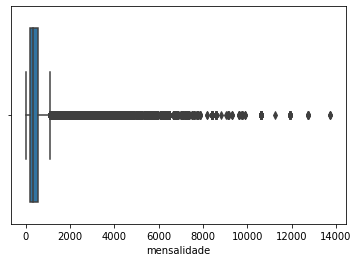

In [21]:
#OUTLIERS
sns.boxplot(x=df['mensalidade'])

In [22]:
#criando z-score para remocao de outliers
df["z"]=np.abs(stats.zscore(df['mensalidade']))
print(df["z"])

0          0.477789
1          0.454994
2          0.409419
3          0.341050
4          0.249900
             ...   
1582477    0.592151
1582478    0.407780
1582479    0.129109
1582480    0.028798
1582481    0.347580
Name: z, Length: 1582482, dtype: float64


In [31]:
df[(df["z"] < 3)]["mensalidade"].describe()

count    1.553814e+06
mean     4.100471e+02
std      3.303408e+02
min      1.190000e+01
25%      1.811390e+02
50%      3.060260e+02
75%      5.270072e+02
max      1.914346e+03
Name: mensalidade, dtype: float64

In [23]:
#Removendo outliers
df_filtrado=df[(df["z"] < 3)]
df_filtrado=df_filtrado[(df_filtrado["mensalidade"] < 900)]

<AxesSubplot:xlabel='mensalidade'>

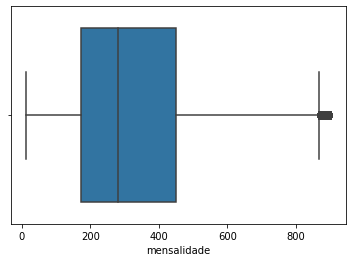

In [32]:
#Verificando Outliers
sns.boxplot(x=df_filtrado['mensalidade'])

In [33]:
#Aplicando o log
df_filtrado["logy"]=np.log(df_filtrado["mensalidade"])

In [34]:
df_filtrado["logy"].describe()

count    1.414914e+06
mean     5.594922e+00
std      6.701609e-01
min      2.476538e+00
25%      5.142786e+00
50%      5.638109e+00
75%      6.107025e+00
max      6.802360e+00
Name: logy, dtype: float64

<AxesSubplot:xlabel='logy'>

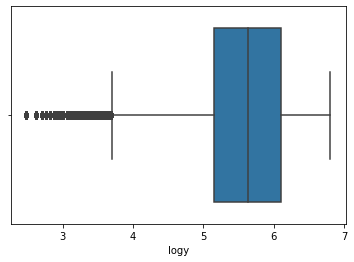

In [35]:
#OUTLIERS
sns.boxplot(x=df_filtrado['logy'])

<AxesSubplot:xlabel='mensalidade'>

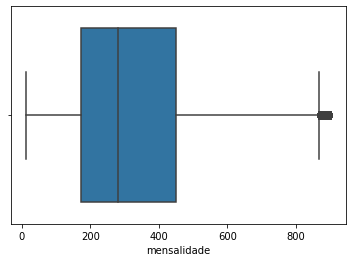

In [36]:
#OUTLIERS
sns.boxplot(x=df_filtrado['mensalidade'])

In [ ]:
#Removendo outliers com base no "z"
df_filtrado=df[(df["z"] >= 3.5)]
df_filtrado=df_filtrado[(df_filtrado["mensalidade"] < 850)]

In [ ]:
#df_filtrado=df_filtrado[(df_filtrado["logy"] > 3.5)]

In [37]:
df_filtrado["logy"]=np.log(df_filtrado["mensalidade"])

<AxesSubplot:xlabel='logy'>

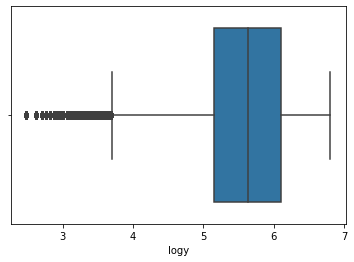

In [38]:
#Checando mais outliers
sns.boxplot(x=df_filtrado['logy'])

<AxesSubplot:xlabel='z'>

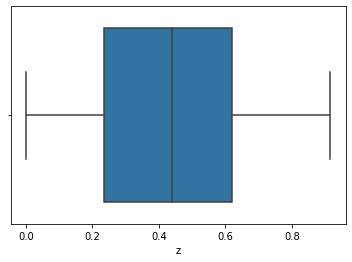

In [39]:
#Checando mais outliers
sns.boxplot(x=df_filtrado['z'])

In [40]:
data=df_filtrado

In [43]:
data.columns

Index(['ano_mes', 'contratacao', 'segmentacao', 'in_odonto', 'in_obstetricia',
       'tipo', 'abrangencia', 'fator', 'acomodacao', 'internacao',
       'cd_faixa_etaria', 'nm_regiao', 'mensalidade', 'z', 'ano', 'mes',
       'logy'],
      dtype='object')

In [42]:
data.dtypes

ano_mes             object
contratacao         object
segmentacao         object
in_odonto            int64
in_obstetricia       int64
tipo                object
abrangencia         object
fator               object
acomodacao          object
internacao          object
cd_faixa_etaria      int64
nm_regiao           object
mensalidade        float64
z                  float64
ano                 object
mes                 object
logy               float64
dtype: object

In [44]:
df_filtrado["ano"]=df_filtrado["ano"].astype('int64')

In [45]:
df_filtrado.shape

(1414914, 17)

In [46]:
#Tranformando para dummies e removendo variaveis redundantes
data=df_filtrado
cat_vars=["ano","mes",'contratacao','segmentacao','in_obstetricia','abrangencia',
          'fator','acomodacao','internacao',"cd_faixa_etaria","nm_regiao"]
for var in cat_vars:
    cat_list='var'+'_'+ var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [47]:
to_keep

['ano_mes',
 'in_odonto',
 'tipo',
 'mensalidade',
 'z',
 'logy',
 'ano_2015',
 'ano_2016',
 'ano_2017',
 'ano_2018',
 'ano_2019',
 'ano_2020',
 'mes_01',
 'mes_02',
 'mes_03',
 'mes_04',
 'mes_05',
 'mes_06',
 'mes_07',
 'mes_08',
 'mes_09',
 'mes_10',
 'mes_11',
 'mes_12',
 'contratacao_Coletivo por adesão',
 'contratacao_Individual ou familiar',
 'segmentacao_Ambulatorial',
 'segmentacao_Ambulatorial e Hospitalar',
 'segmentacao_Hospitalar',
 'in_obstetricia_0',
 'in_obstetricia_1',
 'abrangencia_Estadual',
 'abrangencia_Grupo de estados',
 'abrangencia_Grupo de municípios',
 'abrangencia_Municipal',
 'abrangencia_Nacional',
 'fator_Ausente',
 'fator_Co-participação',
 'fator_Franquia',
 'fator_Franquia + Co-participação',
 'acomodacao_Coletiva',
 'acomodacao_Individual',
 'acomodacao_Não identificado',
 'acomodacao_Não se aplica',
 'internacao_Ausente',
 'internacao_Parcial com internação',
 'internacao_Parcial sem internação',
 'internacao_Total',
 'cd_faixa_etaria_1',
 'cd_faixa_

In [48]:
data_final=data[to_keep]
data_final.columns.values
#del data_final["in_obstetricia_0"]
#del data_final["contratacao_Coletivo por adesão"]
del data_final["ano_mes"]
del data_final["z"]
del data_final["mensalidade"]
del data_final["tipo"]

In [51]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
#Gerando uma amostra
data_final2=data_final.sample(10000)

In [53]:
#separando em variaveis target e preditoras
x=data_final2.drop("logy",axis=1)
y=data_final2["logy"]

In [54]:
cols_drop = ["cd_faixa_etaria_1","fator_Ausente","ano_2019","internacao_Ausente","abrangencia_Nacional",
             "in_obstetricia_1","abrangencia_Grupo de municípios","segmentacao_Ambulatorial e Hospitalar",
             "abrangencia_Grupo de estados",'ano_2015',"mes_01",'fator_Franquia','acomodacao_Individual',
             'fator_Franquia + Co-participação',"acomodacao_Coletiva","acomodacao_Não identificado",
             "acomodacao_Não se aplica","acomodacao_Não identificado","internacao_Parcial com internação",
             "internacao_Parcial sem internação","cd_faixa_etaria_10","nm_regiao_Norte"]

In [55]:
X = x.drop(cols_drop,axis=1)
calc_vif(X)

,variables,VIF
0,in_odonto,1.011771
1,ano_2016,1.109120
2,ano_2017,1.157238
3,ano_2018,1.244197
4,ano_2020,1.717343
5,mes_02,1.846959
6,mes_03,1.869985
7,mes_04,1.943646
8,mes_05,2.000454
9,mes_06,2.063389


In [56]:
x= x.drop(cols_drop, axis=1)

In [59]:
#testando modelo SVM
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Normalizando os dados as variaveis preditoras
normalizador=MinMaxScaler(feature_range=(0,1))
x_norm=normalizador.fit_transform(x)

#Criacao do modelo
modelo=SVR()# VALORES DEFEL, KERNEL RBF, GAMMA SOH VALE PARA ALGUNS, C=1, O EPSON=0.1 TEM A REGRESSAO QUE EH O TAMANHO DO CANAL
kfold=KFold(n_splits=3)
resultado=cross_val_score(modelo,x_norm,y,cv=kfold,n_jobs=-1)
print(resultado.mean())

0.3314418401742005


In [ ]:
#tunning da SVM
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
#Definindo valores que serao testados na SVR
c=np.array([1.0,0.95,1.05,1.1,1.2,1.5,2,0.9,0.8]) # constante de regularizacao, testar maiores e menores que o default, se der extremos, varias mais
kernel=["linear","poly","rbf","sigmoid"]
polinomio=np.array([2,3,4]) # soh serao usados para kernel polinomio, para  o resto serao ignorados
epsilon=np.array([0.1,0.2,0.05,0.03,0.02,0.01,0.005])
valores_grid={"C":c,"kernel":kernel,"degree":polinomio,"epsilon": epsilon}

#Criacao do modelo
modelo=SVR()

#Criando os grids
kfold=KFold(n_splits=3,shuffle=True)# sempre importante e faz toda diferenca
gridSVM=GridSearchCV(estimator=modelo,param_grid=valores_grid,cv=kfold,n_jobs=-1)
gridSVM.fit(x_norm,y)
#Imprimindo melhores parametros
print("Melhor valor constante de regularizacao: ", gridSVM.best_estimator_.C)
print("Melhor KERNEL: ", gridSVM.best_estimator_.kernel)
print("Melhor grau polinomio: ", gridSVM.best_estimator_.degree)
print("Melhor valor epsilon: ", gridSVM.best_estimator_.epsilon)
print("R2: ",gridSVM.best_score_)

In [ ]:
#Testando regressoes com regularizacoes
#Separando em treino e teste
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y, test_size=0.30,random_state=14) 

In [ ]:
def modeloregressao(a,b,c,d):
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import Ridge
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import ElasticNet
  x_treino=a
  y_treino=b
  x_teste=c
  y_teste=d
  reg=LinearRegression()
  ridge=Ridge()
  lasso=Lasso()
  elastic=ElasticNet()
  reg.fit(x_treino,y_treino)
  ridge.fit(x_treino,y_treino)
  lasso.fit(x_treino,y_treino)
  elastic.fit(x_treino,y_treino)
  resul_reg=reg.score(x_teste, y_teste)
  resul_ridge=ridge.score(x_teste, y_teste)
  resul_lasso=lasso.score(x_teste, y_teste)
  resul_elastic=elastic.score(x_teste, y_teste)
  dic_regmodels={'Linear':resul_reg,'Ridge':resul_ridge,'Lasso':resul_lasso,'Elastic':resul_elastic}
  melhor_modelo=max(dic_regmodels,key=dic_regmodels.get) # o paramentro get define o criterio do valor maximo, o .get pega os valores do dicionario
  print('Regressao Linear:',resul_reg,'Regressao Ridge:',resul_ridge,'Regressao Lasso:',resul_lasso,'Regressao Elastic:',resul_elastic)
  print('O melhor modelo foi:',melhor_modelo,'com o valor:',dic_regmodels[melhor_modelo])

In [ ]:
modeloregressao(x_treino,y_treino,x_teste,y_teste)

In [ ]:
#Definindo os valores que serao testados
#o RandomizedSearchCV cv vai pegar os melhores  valores das combinacoes abaixo, MAS ALEATORIOS, ELE NAO TESTA TODOS .. ESSA EH A DIFERENCA QUANTO AO GRIDSEARCHCV
valores={'alpha':[0.1,0.5,1,2,5,10,25,50,80,90,95,99,100,110,112,115,125,150,200,300,500,750,1000,2000,3000,5000]}

In [ ]:
#CrIando o modelo
#Custo computacional muito alto
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
modelo= Ridge()
procura=GridSearchCV(estimator=modelo,param_grid=valores,cv=5)# nao precisamos setra o numero de itracoes pois ele vai testar tudo
procura.fit(x,y)
# ela usa o kfold padrao, e se for classificacao ja usa o stratified kfold
#Imprimindo o resultado
print ('Melhor Score:',procura.best_score_)
print ('Melhor Alpha:',procura.best_estimator_.alpha)


In [ ]:
##Testando com Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#criacao do modelo
modelo=GradientBoostingRegressor(n_estimators=500)
resultado=cross_val_score(modelo,x,y,cv=3,n_jobs=-1)# -1 utiliza todos os cores do computador
print(resultado.mean())

In [ ]:
##Tunando Gradient Boosting
#Tuning
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Definindo os valores que serao testados em GB
valores_grid={"learning_rate": np.array([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.15,0.095,0.05,0.06,0.07,0.01,0.001]),"n_estimators": np.array([10,20,40,100,200,300,350,400,450,500])}
#se a melhor perromance for os extremos, podenso ir refinando os extremos
#na teoria, quanto maior o numero de estimadores eh melhor
#lembrar de fixar o random o state

# geralmente a mesma % que aumento os estimadores eu tenho que reduzir o learning rate
#Criacao do modelo
modelo=GradientBoostingRegressor()
#criando os grids:
gridGB=GridSearchCV(estimator=modelo,param_grid=valores_grid,cv=5,n_jobs=-1)
gridGB.fit(x,y)

#imprimindo melhores parametros
print("Melhor taxa de aprendizagem: ",gridGB.best_estimator_.learning_rate)
print("Melhor numero de estimadores: ",gridGB.best_estimator_.n_estimators)
print("R2: ",gridGB.best_score_)
#https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error

In [ ]:
#testando arvore de decisao
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV #poderia ser a randomized search cv
#from sklearn.metrics import fbeta_score,r2_score

#Definindo os valores que serao testados em DecisionTree:
minimos_split=np.array([2,3,4,5,6,7]) # quantidade minima de amostra que term que ter pra fazer o split
maximo_nivel=np.array([3,4,5,6,7,9,11]) # tamanho da arvore, quantidade maximo de niveis
algoritmo=["mse","friedman_mse","mae"] #aqui ele faz a escolha do melhor split( cart, por exemplo- considera o menor erro e minimiza a funcao de custo) mas ele sempre considera media e desvio padrao, soh mud ao metodo de corte
valores_grid={"min_samples_split":minimos_split,"max_depth":maximo_nivel,"criterion":algoritmo}

#criacao do modelo
modelo=DecisionTreeRegressor() #Instancia a funcao

#Criando os grids
gridDecisionTree=GridSearchCV(estimator=modelo,param_grid=valores_grid,cv=5)# cv=5 numero d efoldos pra fazer o crossvalidation
gridDecisionTree=GridSearchCV(estimator=modelo,param_grid=valores_grid,cv=5) # variando o tipo de score neg_mean_absolute_error
gridDecisionTree.fit(x,y)

#Imprimindo os melhores parametros
print("Minimo split: ",gridDecisionTree.best_estimator_.min_samples_split)
print("Maxima Profundidade: ",gridDecisionTree.best_estimator_.max_depth)
print("Algoritmo Escolhido: ",gridDecisionTree.best_estimator_.criterion)
print("Coeficiente R2: ",gridDecisionTree.best_score_) # basta ver o score na documentacao